In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import BoxStyle
from matplotlib.path import Path
from matplotlib import rcParams
rcParams['mathtext.default'] = 'regular'
from scipy import stats

sns.set(font_scale = 1.4, font="Arial")
sns.set_style(style='ticks')

%matplotlib inline

In [10]:
aci_df = pd.read_csv('../data/aci_curve_data.csv')

aci_df = aci_df[~aci_df['which_400'].isin(['first', 'second', 'fourth', 'fifth'])]

# note, one licor got stuck at 1000umol/m-2/s-1 of light during the ACi curve (as opposed to 1500) so I'm removing those data points here 
aci_df = aci_df[aci_df['light'] == 1500]

In [21]:
def compare_model_parameters(df, trait, y_axis_label, file_name):
    
    # Group df in order to have one data point per plant
    grouped_df = df.groupby(['plant', 'line', 'type']).agg({f'{trait}': ['mean']})
    grouped_df.columns = [f'{trait}']
    grouped_df = grouped_df.reset_index()

    # Add new tidy line name
    line_dict = {'wt': 'wild-type', '1.10.18': 'Line 1', '1.10.19': 'Line 2', '1.10.32': 'Line 3', '1.12.2': 'Line 4'}
    grouped_df['Line_name'] = grouped_df['line'].map(line_dict)
    
    # T-test of each mutant line vs wild-type
    for line in ['Line 1', 'Line 2', 'Line 3', 'Line 4']:
        t_test = stats.ttest_ind(grouped_df[grouped_df['Line_name'] == line][trait].to_list(),
                                 grouped_df[grouped_df['Line_name'] == 'wild-type'][trait].to_list(), 
                                 equal_var=True)
        print(line)
        print(t_test)

    # T-test of all mutant lines grouped together vs wild-type
    t_test = ['']
    t_test = stats.ttest_ind(grouped_df[grouped_df['type'] == 'mutant'][trait].to_list(),
                             grouped_df[grouped_df['type'] == 'wt'][trait].to_list(), 
                             equal_var=True)
    print('wt_vs_all_mutants')
    print(t_test)

    # Plot!
    colours = ['gray', '#009E73']
    ax = sns.barplot(x="Line_name", y=trait, hue="type", data=grouped_df, dodge=False, ci='sd', palette=colours, saturation=0.5,
                order=['wild-type', 'Line 1', 'Line 2', 'Line 3', 'Line 4'])
    
    
    ax.legend_.remove()
    ax.set_ylabel(f'{y_axis_label}')
    ax.set_xlabel('Line')
    
    plt.savefig(file_name, transparent=True, dpi=300, bbox_inches='tight')

Line 1
Ttest_indResult(statistic=0.8252453893880619, pvalue=0.43314934903772295)
Line 2
Ttest_indResult(statistic=1.0269106361049416, pvalue=0.33450785968248503)
Line 3
Ttest_indResult(statistic=0.885659448869258, pvalue=0.4051964514906455)
Line 4
Ttest_indResult(statistic=0.6533586077765652, pvalue=0.5318500946590536)
wt_vs_all_mutants
Ttest_indResult(statistic=0.9931929211767383, pvalue=0.33141498388262913)


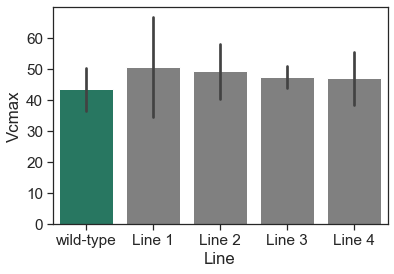

In [22]:
# Vcmax
compare_model_parameters(aci_df, 'pce_Vcmax', 'Vcmax', '../figures/Vcmax.pdf')

Line 1
Ttest_indResult(statistic=0.6554304242983322, pvalue=0.5305828949777409)
Line 2
Ttest_indResult(statistic=0.7462664903107565, pvalue=0.47686109371358243)
Line 3
Ttest_indResult(statistic=0.6806790142058095, pvalue=0.5179487200968168)
Line 4
Ttest_indResult(statistic=0.8550584993451019, pvalue=0.41738913921372733)
wt_vs_all_mutants
Ttest_indResult(statistic=0.9909383102874311, pvalue=0.332490216135067)


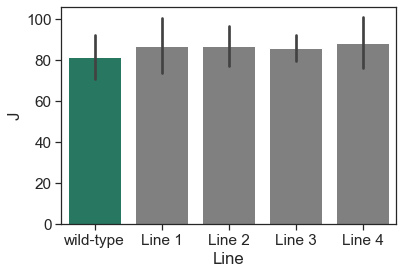

In [13]:
# J
compare_model_parameters(aci_df, 'pce_J', 'J', '../figures/J.pdf')

Line 1
Ttest_indResult(statistic=0.21500329089187833, pvalue=0.835144507633451)
Line 2
Ttest_indResult(statistic=0.4310243502649518, pvalue=0.6778292052156367)
Line 3
Ttest_indResult(statistic=0.05762006944411349, pvalue=0.9556615689090656)
Line 4
Ttest_indResult(statistic=0.4542199791661299, pvalue=0.6617406174589223)
wt_vs_all_mutants
Ttest_indResult(statistic=0.43704657017681775, pvalue=0.6663374946556256)


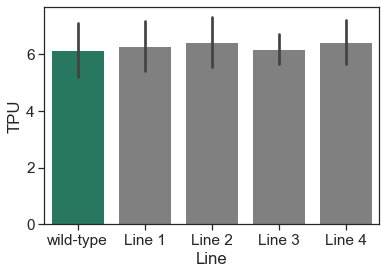

In [14]:
# TPU
compare_model_parameters(aci_df, 'pce_TPU', 'TPU', '../figures/TPU.pdf')

Line 1
Ttest_indResult(statistic=0.9361601718947407, pvalue=0.3765857564757503)
Line 2
Ttest_indResult(statistic=-0.4795530828214533, pvalue=0.6443808532794062)
Line 3
Ttest_indResult(statistic=-1.267742048021404, pvalue=0.24542883291629022)
Line 4
Ttest_indResult(statistic=0.43975636747608426, pvalue=0.6717513861849609)
wt_vs_all_mutants
Ttest_indResult(statistic=-0.02411706436395748, pvalue=0.9809766489140319)


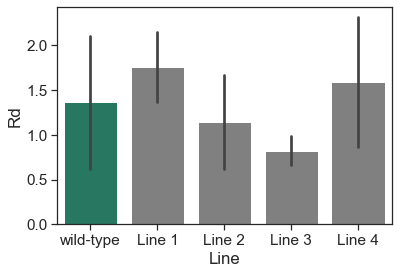

In [17]:
# Rd
compare_model_parameters(aci_df, 'pce_Rd', 'Rd', '../figures/Rd.pdf')

Line 1
Ttest_indResult(statistic=-0.3929333148036438, pvalue=0.7046316636285154)
Line 2
Ttest_indResult(statistic=-1.7486958981165217, pvalue=0.11846757668942909)
Line 3
Ttest_indResult(statistic=-1.008981580177749, pvalue=0.3465810191058598)
Line 4
Ttest_indResult(statistic=0.02770934206629786, pvalue=0.9785727338120371)
wt_vs_all_mutants
Ttest_indResult(statistic=-0.9133287086489115, pvalue=0.37097096692807185)


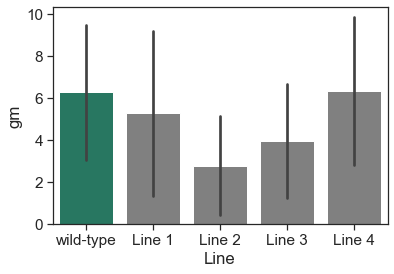

In [18]:
# gm
compare_model_parameters(aci_df, 'pce_gm', 'gm', '../figures/gm.pdf')